In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
def mean(a):
    return sum(a) / len(a)

In [219]:
def betaValFromGradVar(d_G, d_nu, L, HR):
    '''
    Calculates beta value from lense gradient variation
    
    d_G  - lense gradient change,     [kGs/cm]
    d_nu - betatrone tune change
    L    - lense length,              [cm]
    HR   - magnetic rigidity of ring, [kGs*cm]
    '''
    beta = (4*np.pi * HR / L) * d_nu / d_G
    return beta

In [244]:
df = pd.read_csv('../../measurements/30122021/dnu_dG(d1)_edited.dat', sep=' ')

In [331]:
pict_path = '../../build/python/30122021/'

In [86]:
HR    = 3335.63 * 938.4 / 950 # kGs * cm
kappa = 0.01814               # kGs/cm from dshwartz_phd.pdf
L     = 14                    # cm

In [272]:
bx = []
bz = []

init_meas    = df.iloc[1]
i0, v0x, v0z = init_meas
print('initial point:\n', init_meas,'\n')

for i in range(len(df)):
              
    v1x = df.loc[i, 'nu_x']
    v1z = df.loc[i, 'nu_z']
    i1  = df.loc[i, '1d1,A']
    
    dnux = v1x - v0x
    dnuz = v1z - v0z
    di   = i1  - i0
    
    bxval  = betaValFromGradVar(kappa*di, dnux, L, HR)
    bzval  = betaValFromGradVar(kappa*di, dnuz, L, HR)
    
    bx = np.append(bx, bxval)
    bz = np.append(bz, bzval)
    
    
    print("{:0.3f}".format(i1), '\t', "{:0.5f}".format(v0x), '\t', "{:0.5f}".format(v0z), 
          '\t', "{:0.1f}".format(bxval), '\t', "{:0.1f}".format(bzval))

initial point:
 1d1,A    114.08400
nu_x       0.17569
nu_z       0.16986
Name: 1, dtype: float64 

113.184 	 0.17569 	 0.16986 	 172.1 	 168.5
114.084 	 0.17569 	 0.16986 	 nan 	 nan
114.184 	 0.17569 	 0.16986 	 733.7 	 -260.9
113.684 	 0.17569 	 0.16986 	 489.1 	 -211.9
113.284 	 0.17569 	 0.16986 	 226.2 	 53.0
112.884 	 0.17569 	 0.16986 	 16.3 	 297.5
112.684 	 0.17569 	 0.16986 	 -54.7 	 377.3
112.484 	 0.17569 	 0.16986 	 -128.4 	 455.5
112.284 	 0.17569 	 0.16986 	 -182.1 	 492.7
112.084 	 0.17569 	 0.16986 	 -220.1 	 556.8
111.884 	 0.17569 	 0.16986 	 -257.2 	 594.3
111.684 	 0.17569 	 0.16986 	 -289.4 	 635.8
111.484 	 0.17569 	 0.16986 	 -314.2 	 670.3
111.284 	 0.17569 	 0.16986 	 -341.8 	 700.5
111.084 	 0.17569 	 0.16986 	 -360.3 	 721.7
111.284 	 0.17569 	 0.16986 	 -345.9 	 709.2
111.484 	 0.17569 	 0.16986 	 -332.3 	 689.8
111.884 	 0.17569 	 0.16986 	 -289.0 	 649.2
112.284 	 0.17569 	 0.16986 	 -220.1 	 581.5
112.684 	 0.17569 	 0.16986 	 -108.3 	 476.3
113.084 	 0.

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


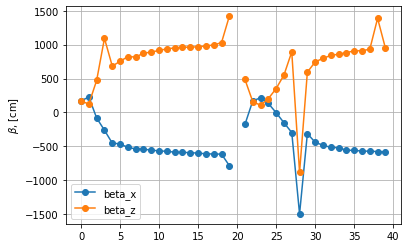

In [101]:
plt.plot(bx, 'o-', label='beta_x')
plt.plot(bz, 'o-', label='beta_z')
plt.grid()
plt.ylabel(r'$\beta$, [cm]')
plt.legend()

plt.savefig(fname=pict_path+'beta_fixed_1st_meas.png', dpi=300)

172.09486280924642 168.47181306589027


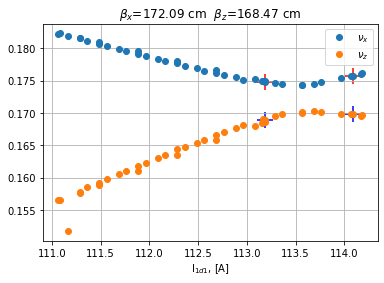

In [330]:
plt.plot(df['1d1,A'], df['nu_x'], 'o', label=r'$\nu_x$')
plt.plot(df['1d1,A'], df['nu_z'], 'o', label=r'$\nu_z$')

plt.scatter(df.loc[0,'1d1,A'],  df.loc[0,'nu_x'],  c='r', marker='+', s=250)
plt.scatter(init_meas['1d1,A'], init_meas['nu_x'], c='r', marker='+', s=250)

plt.scatter(df.loc[0,'1d1,A'],  df.loc[0,'nu_z'],  c='b', marker='+', s=250)
plt.scatter(init_meas['1d1,A'], init_meas['nu_z'], c='b', marker='+', s=250)

plt.grid()
plt.xlabel(r'I$_{1d1}$, [A]')
plt.legend()

beta_x = betaValFromGradVar(kappa*(df.loc[0,'1d1,A']-init_meas['1d1,A']), (df.loc[0,'nu_x']-init_meas['nu_x']), L, HR)
beta_z = betaValFromGradVar(kappa*(df.loc[0,'1d1,A']-init_meas['1d1,A']), (df.loc[0,'nu_z']-init_meas['nu_z']), L, HR)

print(beta_x, beta_z)

plt.title(r'$\beta_x$=' + '%.2f'%beta_x + r' cm  $\beta_z$=' + '%.2f'%beta_z + ' cm')

plt.savefig(fname=pict_path+'nu_1d1_dependence_beta_measure.png', dpi=300)

plt.show()

In [184]:
dfc = df[((df['1d1,A']<112) & (df['1d1,A']>111.0))].reset_index()

In [185]:
dfc

index    1d1,A     nu_x     nu_z
0      10  111.884  0.17916  0.16184
1      11  111.684  0.17995  0.16050
2      12  111.484  0.18070  0.15917
3      13  111.284  0.18156  0.15783
4      14  111.084  0.18232  0.15658
5      15  111.284  0.18163  0.15768
6      16  111.484  0.18099  0.15886
7      17  111.884  0.17959  0.16110
8      35  111.963  0.17890  0.16232
9      36  111.760  0.17962  0.16100
10     37  111.561  0.18040  0.15987
11     38  111.360  0.18112  0.15850
12     39  111.163  0.18188  0.15173
13     40  111.064  0.18228  0.15659

In [203]:
bx = []
bz = []

v0x = dfc.loc[0, 'nu_x']
v0z = dfc.loc[0, 'nu_z']
i0  = dfc.loc[0, '1d1,A']

# v0x = df.loc[18, 'nu_x']
# v0z = df.loc[18, 'nu_z']
# i0  = df.loc[18, '1d1,A']
for i in range(len(dfc)):
   
    v1x = dfc.loc[i, 'nu_x']
    v1z = dfc.loc[i, 'nu_z']
    i1  = dfc.loc[i, '1d1,A']
    
    dnux = v1x - v0x
    dnuz = v1z - v0z
    di   = i1 - i0
    
    bxval  = 4 * np.pi * HR / (kappa * L) * dnux / di
    bx = np.append(bx, bxval)
    bzval  = 4 * np.pi * HR / (kappa * L) * dnuz / di
    bz = np.append(bz, bzval)
    
    
    print(dfc.loc[i, 'index'], "{:0.3f}".format(i1), '\t', "{:0.5f}".format(v0x), '\t', "{:0.5f}".format(v0z), 
          '\t', "{:0.1f}".format(bxval), '\t', "{:0.1f}".format(bzval))

10 111.884 	 0.17916 	 0.16184 	 nan 	 nan
11 111.684 	 0.17916 	 0.16184 	 -644.0 	 1092.3
12 111.484 	 0.17916 	 0.16184 	 -627.7 	 1088.3
13 111.284 	 0.17916 	 0.16184 	 -652.1 	 1089.6
14 111.084 	 0.17916 	 0.16184 	 -644.0 	 1072.0
15 111.284 	 0.17916 	 0.16184 	 -671.2 	 1130.4
16 111.484 	 0.17916 	 0.16184 	 -745.9 	 1214.6
17 111.884 	 0.17916 	 0.16184 	 inf 	 -inf
35 111.963 	 0.17916 	 0.16184 	 -536.6 	 990.6
36 111.760 	 0.17916 	 0.16184 	 -604.8 	 1104.4
37 111.561 	 0.17916 	 0.16184 	 -625.9 	 994.4
38 111.360 	 0.17916 	 0.16184 	 -609.8 	 1039.2
39 111.163 	 0.17916 	 0.16184 	 -615.1 	 2286.1
40 111.064 	 0.17916 	 0.16184 	 -620.3 	 1043.8


/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars


In [207]:
np.arange(-550, 750, 25)

array([-550, -525, -500, -475, -450, -425, -400, -375, -350, -325, -300,
       -275, -250, -225, -200, -175, -150, -125, -100,  -75,  -50,  -25,
          0,   25,   50,   75,  100,  125,  150,  175,  200,  225,  250,
        275,  300,  325,  350,  375,  400,  425,  450,  475,  500,  525,
        550,  575,  600,  625,  650,  675,  700,  725])

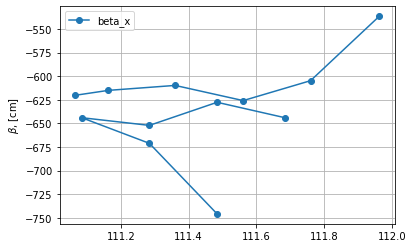

In [212]:
plt.plot(dfc.loc[:,'1d1,A'], bx, 'o-', label='beta_x')
#plt.plot(bz, 'o-', label='beta_z')
plt.ylabel(r'$\beta$, [cm]')
plt.legend()
plt.gca().set_yticks(np.arange(-750, -525, 25))
plt.grid('both')

#plt.savefig(fname=pict_path+'drop_114A_meas.png', dpi=300)

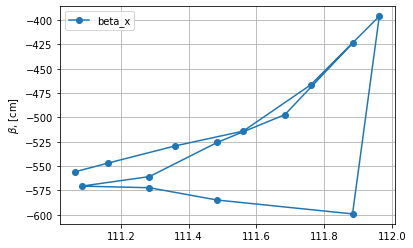

In [202]:
plt.plot(dfc.loc[:,'1d1,A'], bx, 'o-', label='beta_x')
#plt.plot(bz, 'o-', label='beta_z')
plt.grid()
plt.ylabel(r'$\beta$, [cm]')
plt.legend()

#plt.savefig(fname=pict_path+'drop_114A_meas.png', dpi=300)

In [140]:
bx_cleaned = [val for val in bx if -1000 < val < -292]
mean(bx_cleaned)

-531.6702933006245

In [141]:
bz_cleaned = [val for val in bz if 590 < val < 1100]
mean(bz_cleaned)

874.98329817814

TODO:
    1) Должно быть линейно
    2) Значение бета-функции ближе к модельному 1.5 м